### Red Wine Quality Prediction
#### Problem Statement:
#### The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).
#### This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('winequality-red.csv') #import dataset

In [3]:
data.head() #seeing top 5 rows 

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
data.isnull().sum() # seeing null values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
data.shape

(1599, 12)

#### There are no null/missing values

#### seeing statistical description of data

In [6]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

### Observation - 
##### Count - for each columns there is no missing values
### 1) Mean :-
##### mean - 1) fixed acidity, volatile acidity, residual sugar, chlorides, free sulfur dioxide, density, pH, sulphates, alcohol	- mean looks good yet we will check it by distribution
##### mean for quality column is categorical soo mean is of no use
### 2) Standard deviation :-
##### fixed acidity, volatile acidity, residual sugar, chlorides, free sulfur dioxide, density, pH, sulphates, alcohol	- std looks good yet we will check it by distribution
### we will plot distribution to see futhur details

In [7]:
import warnings
warnings.filterwarnings("ignore")

## EDA - Exploratory Data analysis

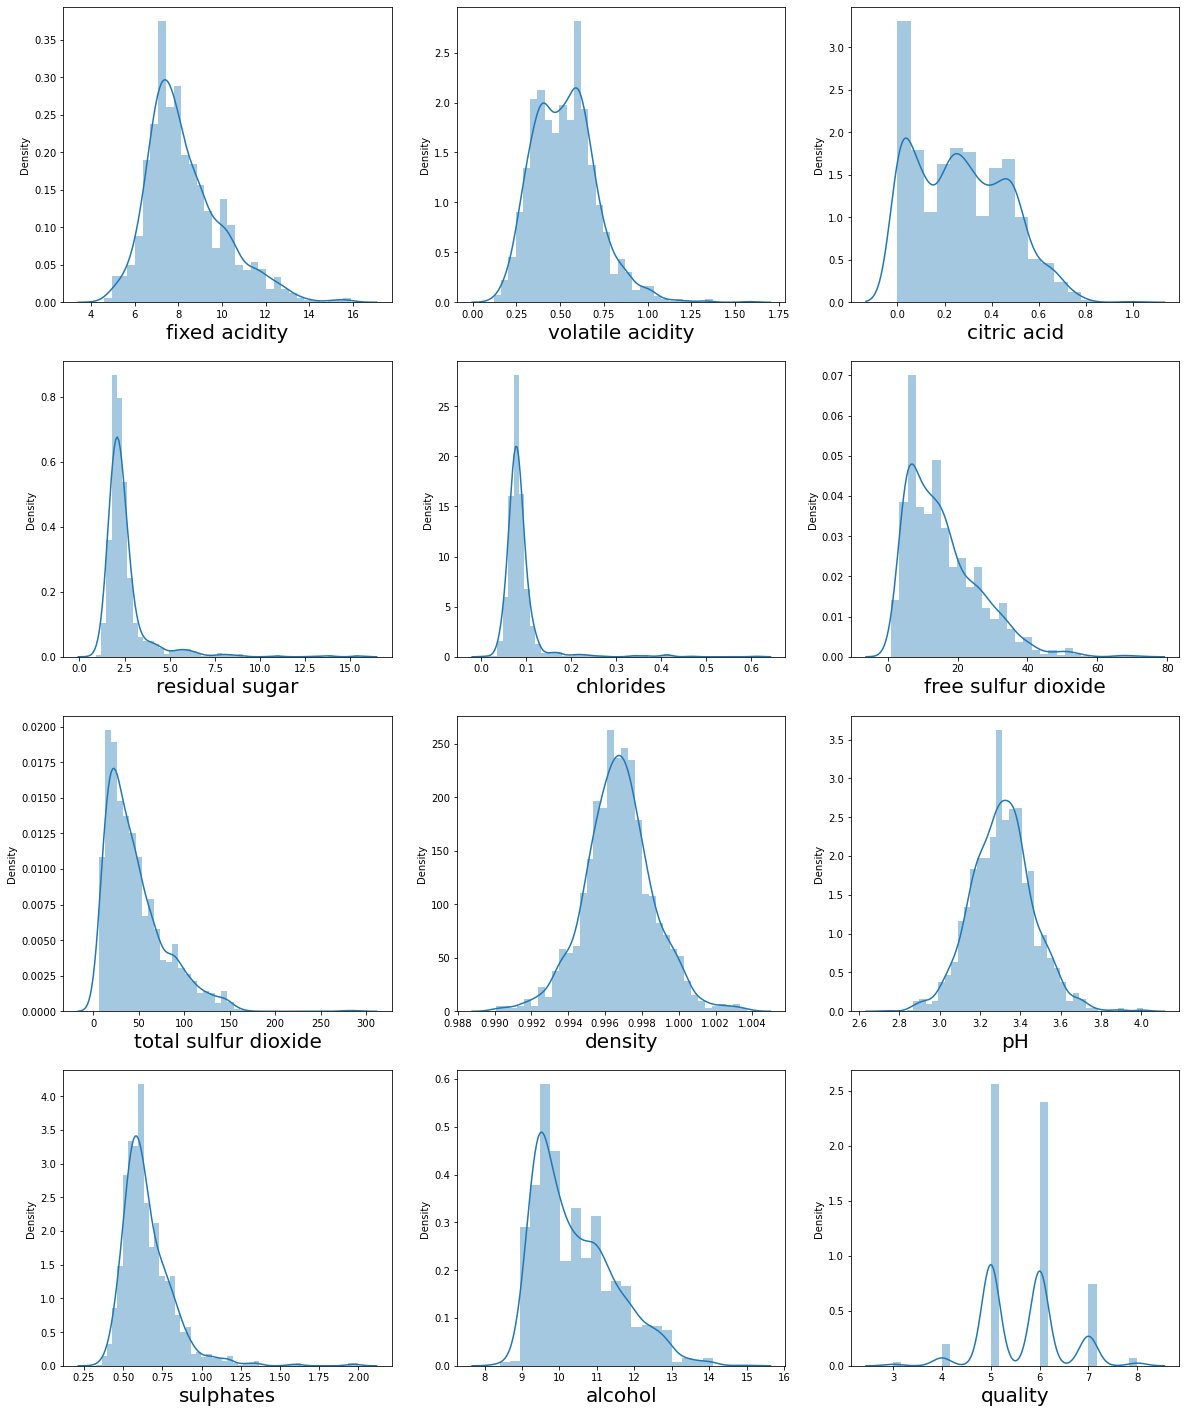

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,25))
plotnumber=1

for column in data:
    if plotnumber<=12: #as there are 12 columns in data
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

#### observation :-

#####  all columns are seems to have skewness and quality column is categorical soo in this it is of no use.(Skewness should be removed)
### i) we have to remove skewness
##### now we will see the features vs label relationship by heatmap

In [9]:
data_mat = data.corr()['quality'].sort_values(ascending = False)

In [10]:
data_mat

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

#### observation -
##### highly correlated with quality(vector/label) column  - alcohal
##### less correlated with quality(vector/label) column - residual sugar
### ii) we can drop residual sugar column as it less correlated by using feature selection technique
### plotting heatmap

<function matplotlib.pyplot.show(close=None, block=None)>

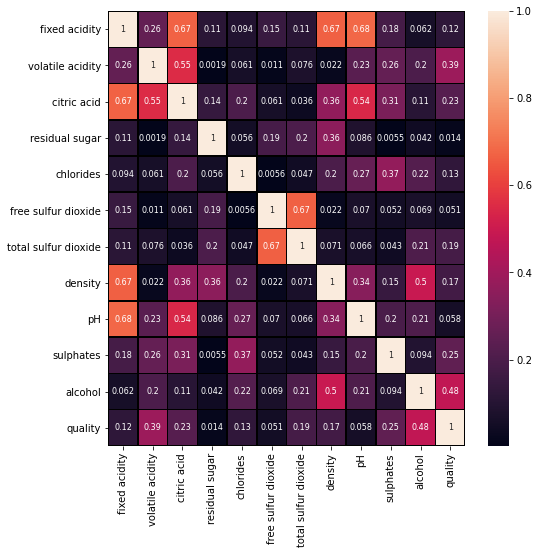

In [11]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr().abs(),annot=True,annot_kws={'size':8},linewidths=.5,linecolor='Black')
plt.show

#### observation- 
##### by looking to the heatmap there is no multicollinearity problem as feature vs feature are not that correlated 

### Checking for outliers plotting - box plot

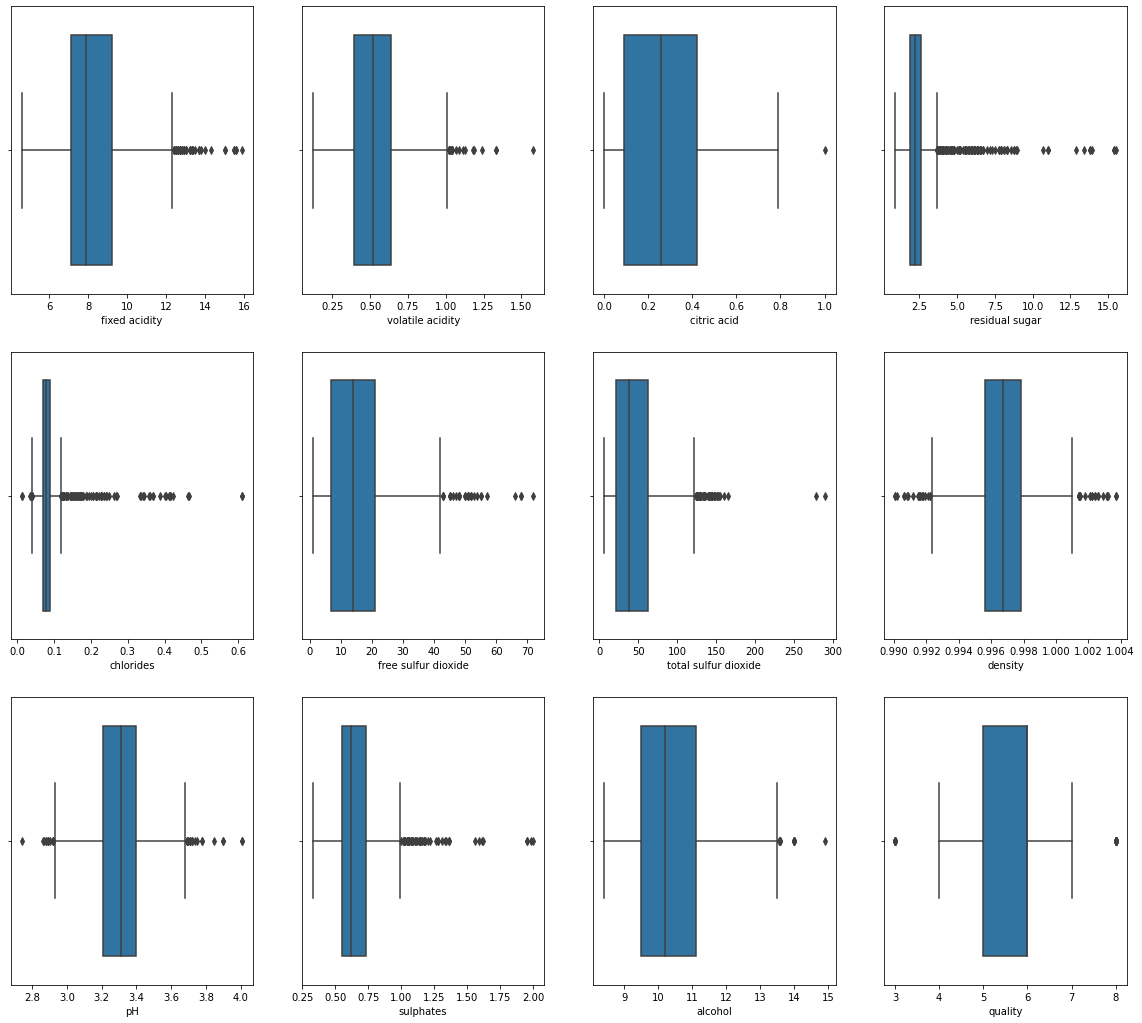

In [12]:
plt.figure(figsize=(20,18))
graph=1

for column in data:
    if graph<=12:
        ax=plt.subplot(3,4,graph)
        sns.boxplot(data[column],orient="h")
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

#### iii) outliers can be seen soo we will remove the outliers 
#### iv) as we can see residual sugar is minimum correlated and having soo much of outliers we will remove residual sugar column.

### Data cleaning 

In [13]:
data.drop(columns=['residual sugar'],axis=1,inplace=True)

In [14]:
data.head()

fixed acidity  volatile acidity  citric acid  chlorides  \
0            7.4              0.70         0.00      0.076   
1            7.8              0.88         0.00      0.098   
2            7.8              0.76         0.04      0.092   
3           11.2              0.28         0.56      0.075   
4            7.4              0.70         0.00      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [15]:
data.shape

(1599, 11)

In [16]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [17]:
### renaming columns 
data.rename(columns={'fixed acidity':'fixed_acidity',"volatile acidity":'volatile_acidity','citric acid':'citric_acid',
                    'free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'},inplace=True)

In [18]:
data.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'chlorides',
       'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH',
       'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [19]:
fp = data['quality']

#### changing quality column - 1 for greater or equal to 7 --> good
#### - 0 for less than 7  --> not good 

In [20]:
outcome=[]
for i in range(len(fp)):
    if fp[i]<7:
        outcome.append(0)
    else:
        outcome.append(1)

In [21]:
data['outcome'] = outcome

In [22]:
type(data.pH)

pandas.core.series.Series

In [23]:
data.drop(columns=['quality'],axis=1,inplace = True)

In [24]:
data.sample(5)

fixed_acidity  volatile_acidity  citric_acid  chlorides  \
170             7.9             0.885         0.03      0.058   
1280            7.1             0.460         0.20      0.077   
69              8.0             0.705         0.05      0.074   
1310            7.5             0.610         0.26      0.073   
341            10.6             0.420         0.48      0.065   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
170                   4.0                   8.0  0.99720  3.36       0.33   
1280                 28.0                  54.0  0.99560  3.37       0.64   
69                    8.0                  19.0  0.99620  3.34       0.95   
1310                 24.0                  88.0  0.99612  3.30       0.53   
341                   5.0                  18.0  0.99720  3.21       0.87   

      alcohol  outcome  
170       9.1        0  
1280     10.4        0  
69       10.5        0  
1310      9.8        0  
341      11.3        0

In [25]:
data['outcome'].value_counts()

0    1382
1     217
Name: outcome, dtype: int64

In [26]:
## Inter quantile range
#quantile 1
q1=data.quantile(0.25)
#QUANTILE 3
q3=data.quantile(0.75)

IQR=q3-q1
IQR

fixed_acidity            2.100000
volatile_acidity         0.250000
citric_acid              0.330000
chlorides                0.020000
free_sulfur_dioxide     14.000000
total_sulfur_dioxide    40.000000
density                  0.002235
pH                       0.190000
sulphates                0.180000
alcohol                  1.600000
outcome                  0.000000
dtype: float64

# Outfiers detection formula
### higherside==> Q3+(1.5*IQR)
### lowerside==>Q3 -(1.5*IQR)

In [27]:
fixed_acidity_high=(q3.fixed_acidity+1.5*IQR.fixed_acidity)
print(fixed_acidity_high)
index = np.where(data['fixed_acidity']>fixed_acidity_high)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

12.349999999999998
(1550, 11)


index  fixed_acidity  volatile_acidity  citric_acid  chlorides  \
0         0            7.4             0.700         0.00      0.076   
1         1            7.8             0.880         0.00      0.098   
2         2            7.8             0.760         0.04      0.092   
3         3           11.2             0.280         0.56      0.075   
4         4            7.4             0.700         0.00      0.076   
...     ...            ...               ...          ...        ...   
1545   1594            6.2             0.600         0.08      0.090   
1546   1595            5.9             0.550         0.10      0.062   
1547   1596            6.3             0.510         0.13      0.076   
1548   1597            5.9             0.645         0.12      0.075   
1549   1598            6.0             0.310         0.47      0.067   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1545                 32.0                  44.0  0.99490  3.45       0.58   
1546                 39.0                  51.0  0.99512  3.52       0.76   
1547                 29.0                  40.0  0.99574  3.42       0.75   
1548                 32.0                  44.0  0.99547  3.57       0.71   
1549                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  outcome  
0         9.4        0  
1         9.8        0  
2         9.8        0  
3         9.8        0  
4         9.4        0  
...       ...      ...  
1545     10.5        0  
1546     11.2        0  
1547     11.0        0  
1548     10.2        0  
1549     11.0        0  

[1550 rows x 12 columns]

In [28]:
volatile_acidity_high=(q3.volatile_acidity+1.5*IQR.volatile_acidity)
print(volatile_acidity_high)
index = np.where(data['volatile_acidity']>volatile_acidity_high)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

1.0150000000000001
(1531, 11)


index  fixed_acidity  volatile_acidity  citric_acid  chlorides  \
0         0            7.4             0.700         0.00      0.076   
1         1            7.8             0.880         0.00      0.098   
2         2            7.8             0.760         0.04      0.092   
3         3           11.2             0.280         0.56      0.075   
4         4            7.4             0.700         0.00      0.076   
...     ...            ...               ...          ...        ...   
1526   1594            6.2             0.600         0.08      0.090   
1527   1595            5.9             0.550         0.10      0.062   
1528   1596            6.3             0.510         0.13      0.076   
1529   1597            5.9             0.645         0.12      0.075   
1530   1598            6.0             0.310         0.47      0.067   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1526                 32.0                  44.0  0.99490  3.45       0.58   
1527                 39.0                  51.0  0.99512  3.52       0.76   
1528                 29.0                  40.0  0.99574  3.42       0.75   
1529                 32.0                  44.0  0.99547  3.57       0.71   
1530                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  outcome  
0         9.4        0  
1         9.8        0  
2         9.8        0  
3         9.8        0  
4         9.4        0  
...       ...      ...  
1526     10.5        0  
1527     11.2        0  
1528     11.0        0  
1529     10.2        0  
1530     11.0        0  

[1531 rows x 12 columns]

In [29]:
chlorides_high=(q3.chlorides+1.5*IQR.chlorides)
print(chlorides_high)
index = np.where(data['chlorides']>chlorides_high)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

0.11999999999999998
(1432, 11)


index  fixed_acidity  volatile_acidity  citric_acid  chlorides  \
0         0            7.4             0.700         0.00      0.076   
1         1            7.8             0.880         0.00      0.098   
2         2            7.8             0.760         0.04      0.092   
3         3           11.2             0.280         0.56      0.075   
4         4            7.4             0.700         0.00      0.076   
...     ...            ...               ...          ...        ...   
1427   1594            6.2             0.600         0.08      0.090   
1428   1595            5.9             0.550         0.10      0.062   
1429   1596            6.3             0.510         0.13      0.076   
1430   1597            5.9             0.645         0.12      0.075   
1431   1598            6.0             0.310         0.47      0.067   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1427                 32.0                  44.0  0.99490  3.45       0.58   
1428                 39.0                  51.0  0.99512  3.52       0.76   
1429                 29.0                  40.0  0.99574  3.42       0.75   
1430                 32.0                  44.0  0.99547  3.57       0.71   
1431                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  outcome  
0         9.4        0  
1         9.8        0  
2         9.8        0  
3         9.8        0  
4         9.4        0  
...       ...      ...  
1427     10.5        0  
1428     11.2        0  
1429     11.0        0  
1430     10.2        0  
1431     11.0        0  

[1432 rows x 12 columns]

In [30]:
free_sulfur_dioxide_high=(q3.free_sulfur_dioxide+1.5*IQR.free_sulfur_dioxide)
print(free_sulfur_dioxide_high)
index = np.where(data['free_sulfur_dioxide']>free_sulfur_dioxide_high)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

42.0
(1412, 11)


index  fixed_acidity  volatile_acidity  citric_acid  chlorides  \
0         0            7.4             0.700         0.00      0.076   
1         1            7.8             0.880         0.00      0.098   
2         2            7.8             0.760         0.04      0.092   
3         3           11.2             0.280         0.56      0.075   
4         4            7.4             0.700         0.00      0.076   
...     ...            ...               ...          ...        ...   
1407   1594            6.2             0.600         0.08      0.090   
1408   1595            5.9             0.550         0.10      0.062   
1409   1596            6.3             0.510         0.13      0.076   
1410   1597            5.9             0.645         0.12      0.075   
1411   1598            6.0             0.310         0.47      0.067   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1407                 32.0                  44.0  0.99490  3.45       0.58   
1408                 39.0                  51.0  0.99512  3.52       0.76   
1409                 29.0                  40.0  0.99574  3.42       0.75   
1410                 32.0                  44.0  0.99547  3.57       0.71   
1411                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  outcome  
0         9.4        0  
1         9.8        0  
2         9.8        0  
3         9.8        0  
4         9.4        0  
...       ...      ...  
1407     10.5        0  
1408     11.2        0  
1409     11.0        0  
1410     10.2        0  
1411     11.0        0  

[1412 rows x 12 columns]

In [31]:
total_sulfur_dioxide_high=(q3.total_sulfur_dioxide+1.5*IQR.total_sulfur_dioxide)
print(total_sulfur_dioxide_high)
index = np.where(data['total_sulfur_dioxide']>total_sulfur_dioxide_high)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

122.0
(1367, 11)


index  fixed_acidity  volatile_acidity  citric_acid  chlorides  \
0         0            7.4             0.700         0.00      0.076   
1         1            7.8             0.880         0.00      0.098   
2         2            7.8             0.760         0.04      0.092   
3         3           11.2             0.280         0.56      0.075   
4         4            7.4             0.700         0.00      0.076   
...     ...            ...               ...          ...        ...   
1362   1594            6.2             0.600         0.08      0.090   
1363   1595            5.9             0.550         0.10      0.062   
1364   1596            6.3             0.510         0.13      0.076   
1365   1597            5.9             0.645         0.12      0.075   
1366   1598            6.0             0.310         0.47      0.067   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1362                 32.0                  44.0  0.99490  3.45       0.58   
1363                 39.0                  51.0  0.99512  3.52       0.76   
1364                 29.0                  40.0  0.99574  3.42       0.75   
1365                 32.0                  44.0  0.99547  3.57       0.71   
1366                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  outcome  
0         9.4        0  
1         9.8        0  
2         9.8        0  
3         9.8        0  
4         9.4        0  
...       ...      ...  
1362     10.5        0  
1363     11.2        0  
1364     11.0        0  
1365     10.2        0  
1366     11.0        0  

[1367 rows x 12 columns]

In [32]:
density_high=(q3.density+1.5*IQR.density)
print(density_high)
index = np.where(data['density']>=density_high)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

1.0011875
(1362, 11)


index  fixed_acidity  volatile_acidity  citric_acid  chlorides  \
0         0            7.4             0.700         0.00      0.076   
1         1            7.8             0.880         0.00      0.098   
2         2            7.8             0.760         0.04      0.092   
3         3           11.2             0.280         0.56      0.075   
4         4            7.4             0.700         0.00      0.076   
...     ...            ...               ...          ...        ...   
1357   1594            6.2             0.600         0.08      0.090   
1358   1595            5.9             0.550         0.10      0.062   
1359   1596            6.3             0.510         0.13      0.076   
1360   1597            5.9             0.645         0.12      0.075   
1361   1598            6.0             0.310         0.47      0.067   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1357                 32.0                  44.0  0.99490  3.45       0.58   
1358                 39.0                  51.0  0.99512  3.52       0.76   
1359                 29.0                  40.0  0.99574  3.42       0.75   
1360                 32.0                  44.0  0.99547  3.57       0.71   
1361                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  outcome  
0         9.4        0  
1         9.8        0  
2         9.8        0  
3         9.8        0  
4         9.4        0  
...       ...      ...  
1357     10.5        0  
1358     11.2        0  
1359     11.0        0  
1360     10.2        0  
1361     11.0        0  

[1362 rows x 12 columns]

In [33]:
density_high=(q3.density-1.5*IQR.density)
print(density_high)
index = np.where(data['density']<=density_high)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

0.9944825
(1218, 11)


index  fixed_acidity  volatile_acidity  citric_acid  chlorides  \
0         0            7.4             0.700         0.00      0.076   
1         1            7.8             0.880         0.00      0.098   
2         2            7.8             0.760         0.04      0.092   
3         3           11.2             0.280         0.56      0.075   
4         4            7.4             0.700         0.00      0.076   
...     ...            ...               ...          ...        ...   
1213   1594            6.2             0.600         0.08      0.090   
1214   1595            5.9             0.550         0.10      0.062   
1215   1596            6.3             0.510         0.13      0.076   
1216   1597            5.9             0.645         0.12      0.075   
1217   1598            6.0             0.310         0.47      0.067   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1213                 32.0                  44.0  0.99490  3.45       0.58   
1214                 39.0                  51.0  0.99512  3.52       0.76   
1215                 29.0                  40.0  0.99574  3.42       0.75   
1216                 32.0                  44.0  0.99547  3.57       0.71   
1217                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  outcome  
0         9.4        0  
1         9.8        0  
2         9.8        0  
3         9.8        0  
4         9.4        0  
...       ...      ...  
1213     10.5        0  
1214     11.2        0  
1215     11.0        0  
1216     10.2        0  
1217     11.0        0  

[1218 rows x 12 columns]

In [34]:
pH_high=(q3.pH+1.5*IQR.pH)
print(pH_high)
index = np.where(data['pH']>=pH_high)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

3.6849999999999996
(1212, 11)


index  fixed_acidity  volatile_acidity  citric_acid  chlorides  \
0         0            7.4             0.700         0.00      0.076   
1         1            7.8             0.880         0.00      0.098   
2         2            7.8             0.760         0.04      0.092   
3         3           11.2             0.280         0.56      0.075   
4         4            7.4             0.700         0.00      0.076   
...     ...            ...               ...          ...        ...   
1207   1594            6.2             0.600         0.08      0.090   
1208   1595            5.9             0.550         0.10      0.062   
1209   1596            6.3             0.510         0.13      0.076   
1210   1597            5.9             0.645         0.12      0.075   
1211   1598            6.0             0.310         0.47      0.067   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1207                 32.0                  44.0  0.99490  3.45       0.58   
1208                 39.0                  51.0  0.99512  3.52       0.76   
1209                 29.0                  40.0  0.99574  3.42       0.75   
1210                 32.0                  44.0  0.99547  3.57       0.71   
1211                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  outcome  
0         9.4        0  
1         9.8        0  
2         9.8        0  
3         9.8        0  
4         9.4        0  
...       ...      ...  
1207     10.5        0  
1208     11.2        0  
1209     11.0        0  
1210     10.2        0  
1211     11.0        0  

[1212 rows x 12 columns]

In [35]:
pH_low=(q3.pH-1.5*IQR.pH)
print(pH_low)
index = np.where(data['pH']<=pH_low)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

3.115
(1143, 11)


index  fixed_acidity  volatile_acidity  citric_acid  chlorides  \
0         0            7.4             0.700         0.00      0.076   
1         1            7.8             0.880         0.00      0.098   
2         2            7.8             0.760         0.04      0.092   
3         3           11.2             0.280         0.56      0.075   
4         4            7.4             0.700         0.00      0.076   
...     ...            ...               ...          ...        ...   
1138   1594            6.2             0.600         0.08      0.090   
1139   1595            5.9             0.550         0.10      0.062   
1140   1596            6.3             0.510         0.13      0.076   
1141   1597            5.9             0.645         0.12      0.075   
1142   1598            6.0             0.310         0.47      0.067   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1138                 32.0                  44.0  0.99490  3.45       0.58   
1139                 39.0                  51.0  0.99512  3.52       0.76   
1140                 29.0                  40.0  0.99574  3.42       0.75   
1141                 32.0                  44.0  0.99547  3.57       0.71   
1142                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  outcome  
0         9.4        0  
1         9.8        0  
2         9.8        0  
3         9.8        0  
4         9.4        0  
...       ...      ...  
1138     10.5        0  
1139     11.2        0  
1140     11.0        0  
1141     10.2        0  
1142     11.0        0  

[1143 rows x 12 columns]

In [36]:
sulphates_high=(q3.sulphates+1.5*IQR.sulphates)
print(sulphates_high)
index = np.where(data['sulphates']>=sulphates_high)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

0.9999999999999999
(1121, 11)


index  fixed_acidity  volatile_acidity  citric_acid  chlorides  \
0         0            7.4             0.700         0.00      0.076   
1         1            7.8             0.880         0.00      0.098   
2         2            7.8             0.760         0.04      0.092   
3         3           11.2             0.280         0.56      0.075   
4         4            7.4             0.700         0.00      0.076   
...     ...            ...               ...          ...        ...   
1116   1594            6.2             0.600         0.08      0.090   
1117   1595            5.9             0.550         0.10      0.062   
1118   1596            6.3             0.510         0.13      0.076   
1119   1597            5.9             0.645         0.12      0.075   
1120   1598            6.0             0.310         0.47      0.067   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1116                 32.0                  44.0  0.99490  3.45       0.58   
1117                 39.0                  51.0  0.99512  3.52       0.76   
1118                 29.0                  40.0  0.99574  3.42       0.75   
1119                 32.0                  44.0  0.99547  3.57       0.71   
1120                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  outcome  
0         9.4        0  
1         9.8        0  
2         9.8        0  
3         9.8        0  
4         9.4        0  
...       ...      ...  
1116     10.5        0  
1117     11.2        0  
1118     11.0        0  
1119     10.2        0  
1120     11.0        0  

[1121 rows x 12 columns]

### percentage data loss

In [37]:
loss_percent = ((1599-1121)/(1599))*100
loss_percent

29.893683552220136

### dividing data in features and vectors/labels

In [38]:
x= data.drop(columns=['outcome'])
y = data['outcome']

In [39]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: outcome, Length: 1121, dtype: int64

### we can see outliers again

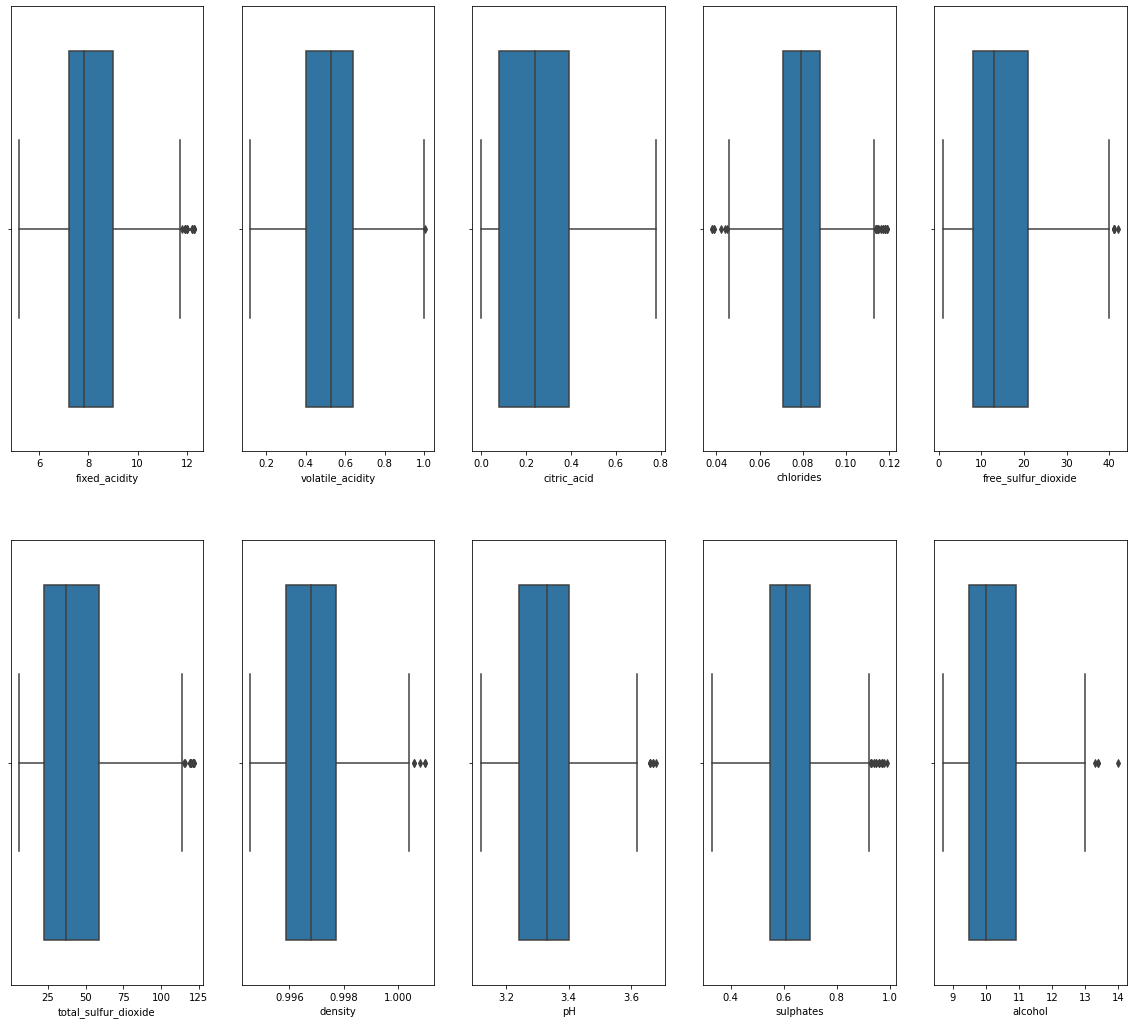

In [40]:
plt.figure(figsize=(20,18))
graph=1

for column in x:
    if graph<=10:
        ax=plt.subplot(2,5,graph)
        sns.boxplot(x= x[column],orient="v")
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

## Transforming data to remove skewness

In [41]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(x)
x

array([[-0.49288528,  1.01807788, -1.53670086, ...,  1.46002524,
        -0.5702994 , -1.07553712],
       [-0.13365524,  1.94438317, -1.53670086, ..., -1.15762603,
         0.53130122, -0.41603149],
       [-0.13365524,  1.3368409 , -1.23244039, ..., -0.57193619,
         0.28393391, -0.41603149],
       ...,
       [-1.72382495, -0.06734606, -0.60934475, ...,  0.79673839,
         1.04799248,  0.95264142],
       [-2.28739185,  0.71629797, -0.67475677, ...,  1.8653776 ,
         0.76253491,  0.12692581],
       [-2.13940078, -1.36091804,  1.19142429, ...,  0.55963284,
         0.36826872,  0.95264142]])

In [43]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [44]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state = i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train) 
    pred_test = lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1) == round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"model perform very well")
        print("At random state",i)
        print('Training accuracy score is',accuracy_score(y_train,pred_train)*100)
        print('Testing accuracy score is',accuracy_score(y_test,pred_test)*100)
    

At random state 41 model perform very well
At random state 41
Training accuracy score is 90.17857142857143
Testing accuracy score is 90.22222222222223
At random state 159 model perform very well
At random state 159
Training accuracy score is 90.17857142857143
Testing accuracy score is 90.22222222222223
At random state 164 model perform very well
At random state 164
Training accuracy score is 90.17857142857143
Testing accuracy score is 90.22222222222223
At random state 171 model perform very well
At random state 171
Training accuracy score is 90.17857142857143
Testing accuracy score is 90.22222222222223
At random state 173 model perform very well
At random state 173
Training accuracy score is 90.17857142857143
Testing accuracy score is 90.22222222222223
At random state 190 model perform very well
At random state 190
Training accuracy score is 89.84375
Testing accuracy score is 89.77777777777777
At random state 219 model perform very well
At random state 219
Training accuracy score is 90

### we can see imbalancing of dataset
#### by, Over sampling using SMOTE(synthetic minority oversampling technique)

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=449)
from collections import Counter
Counter(y_train)

Counter({1: 110, 0: 786})

In [50]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
#Oversampling and upsampling
ove_smp = SMOTE(0.80)
X_train_ns,y_train_ns = ove_smp.fit_resample(x_train,y_train)

print('The no. of classes before fit',format(Counter(y_train)))
print('The no. of classes after fit',format(Counter(y_train_ns)))

The no. of classes before fit Counter({0: 786, 1: 110})
The no. of classes after fit Counter({0: 786, 1: 628})


## 1) Logistic regression

In [61]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_ns,y_train_ns)
pred = lr.predict(x_test)
accuracy_score(y_test,pred)*100

83.55555555555556

In [59]:
pred = lr.predict(x_test)

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90       204
           1       0.34      0.81      0.48        21

    accuracy                           0.84       225
   macro avg       0.66      0.82      0.69       225
weighted avg       0.92      0.84      0.86       225



## 2) Decision Tree classifier

In [107]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_ns,y_train_ns)
pred_dt = dt.predict(x_test)
print(accuracy_score(y_test,pred_dt)*100)
print(classification_report(y_test,pred_dt))

85.77777777777777
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       204
           1       0.36      0.67      0.47        21

    accuracy                           0.86       225
   macro avg       0.66      0.77      0.69       225
weighted avg       0.91      0.86      0.88       225



## 3) Random forest(ensemble approch)

In [109]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_ns,y_train_ns)
pred_rf = rf.predict(x_test)
print(accuracy_score(y_test,pred_rf)*100)
print(classification_report(y_test,pred_rf))

91.55555555555556
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       204
           1       0.53      0.76      0.63        21

    accuracy                           0.92       225
   macro avg       0.75      0.85      0.79       225
weighted avg       0.93      0.92      0.92       225



## 4)Gradient Boosting 

In [110]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train_ns,y_train_ns)
pred_gb = gb.predict(x_test)
print(accuracy_score(y_test,pred_gb)*100)
print(classification_report(y_test,pred_gb))

85.77777777777777
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       204
           1       0.37      0.71      0.48        21

    accuracy                           0.86       225
   macro avg       0.67      0.79      0.70       225
weighted avg       0.91      0.86      0.88       225



## 5) Xtreme Gradient boosting

In [111]:
from xgboost import XGBClassifier
xgbt = XGBClassifier()
xgbt.fit(X_train_ns,y_train_ns)
pred_xgbt = xgbt.predict(x_test)
print(accuracy_score(y_test,pred_xgbt)*100)
print(classification_report(y_test,pred_xgbt))

[13:31:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
90.66666666666666
              precision    recall  f1-score   support

           0       0.97      0.92      0.95       204
           1       0.50      0.76      0.60        21

    accuracy                           0.91       225
   macro avg       0.74      0.84      0.78       225
weighted avg       0.93      0.91      0.92       225



## 6)Support vector machine(svc)

In [113]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_ns,y_train_ns)
pred_svc = svc.predict(x_test)
print(accuracy_score(y_test,pred_svc)*100)
print(classification_report(y_test,pred_svc))

84.88888888888889
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       204
           1       0.34      0.67      0.45        21

    accuracy                           0.85       225
   macro avg       0.65      0.77      0.68       225
weighted avg       0.90      0.85      0.87       225



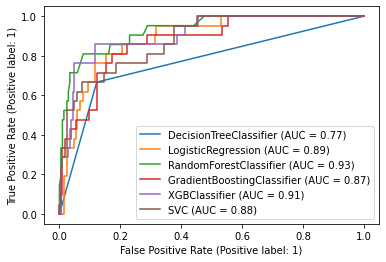

In [114]:
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(dt, x_test, y_test)
plot_roc_curve(lr, x_test, y_test, ax = disp.ax_)
plot_roc_curve(rf, x_test, y_test, ax = disp.ax_)
plot_roc_curve(gb, x_test, y_test, ax = disp.ax_)
plot_roc_curve(xgbt, x_test, y_test, ax = disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax = disp.ax_)

plt.show()

#### Random forest and xtreme boosting giving best Auc

## cross-validation

In [117]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(rf, x, y, cv=5)
print("Cross validation score of random forest model is",scr.mean()*100)

Cross validation score of random forest model is 89.02777777777777


In [118]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(xgbt, x, y, cv=5)
print("Cross validation score of random forest model is",scr.mean()*100)

[13:43:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:43:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:43:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:43:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

### as we can random forest is performing better for this dataset so we do hypertuning to increse its efficiency

In [120]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [124]:
from sklearn.model_selection import GridSearchCV

#creating parameter list to pass in Gridsearchcv
parameter ={'criterion':['gini','entropy'],
            'min_samples_split':range(2,10,2),
            'min_samples_leaf':range(1,10,2),
            'n_estimators': range(90,100,2)
           }

In [125]:
GCV = GridSearchCV(rf,parameter,cv=5,scoring='accuracy')

GCV.fit(X_train_ns,y_train_ns)  #fitting the data in model
GCV.best_params_          #printing the best parameter found by Gridsearchcv
GCV_pred = GCV.best_estimator_.predict(x_test)    #predicting with best parameter 
accuracy_score(y_test, GCV_pred)                  #checking final accuracy

0.92

In [126]:
GCV.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 98}

In [127]:
import numpy as np
a = np.array(y_test)
predicted = np.array(GCV.predict(x_test))
df_com = pd.DataFrame({'original':a,'predicted':predicted},index = range(len(a)))
df_com

original  predicted
0           0          0
1           0          1
2           0          0
3           0          1
4           0          0
..        ...        ...
220         0          0
221         0          0
222         0          0
223         1          1
224         0          0

[225 rows x 2 columns]

In [128]:
# Saving model in pickle format
import joblib
joblib.dump(GCV.best_estimator_,'red wine quality.pkl')

['red wine quality.pkl']